<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/4- Feature Selection.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Variance Threshold

In [2]:
from sklearn.feature_selection import VarianceThreshold

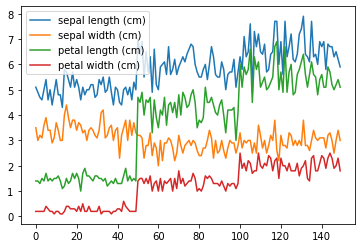

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [4]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [5]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)

VarianceThreshold(threshold=0.2)

In [6]:
selector.get_support()

array([ True, False,  True,  True])

In [7]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [8]:
selector.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

## SelectKBest

In [9]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [16]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [19]:
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
selector.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [23]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

## Recursive feature Elimination

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [18]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[2 1 1 1]
[0.8        0.84666667 0.77333333]


In [19]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## SelectFromModel

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [14]:
X = iris.data
y = iris.target
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(X, y)
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [20]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## Exercice
Sur la base des techniques que nous avons apprises sur la sélection des features, déterminez les caractéristiques les plus pertinentes pour l'ensemble de données du Titanic.

In [21]:
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [22]:
titanic = sns.load_dataset('titanic')
titanic = titanic.drop([ 'class'	
                        	, 'embarked',  'alive'	], axis=1)
titanic.dropna(axis=0, inplace=True)
y = titanic['survived']
X = titanic.drop('survived', axis=1)
numerical_features = ['pclass', 'age', 'fare','sibsp','parch']
categorical_features = ['sex', 'deck','who','adult_male','embark_town','alone']
print(titanic.head())
print(y.shape)
print(X.shape)

numerical_pipline = make_pipeline(SimpleImputer(), MinMaxScaler())
categorical_pipline = make_pipeline(SimpleImputer(
    strategy='most_frequent'), OrdinalEncoder())
preprocessor = make_column_transformer((numerical_pipline, numerical_features),
                                      (categorical_pipline, categorical_features))

preprocessor.fit_transform(X,y)
Xx= preprocessor.transform(X)   


    survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
1          1       1  female  38.0      1      0  71.2833  woman       False   
3          1       1  female  35.0      1      0  53.1000  woman       False   
6          0       1    male  54.0      0      0  51.8625    man        True   
10         1       3  female   4.0      1      1  16.7000  child       False   
11         1       1  female  58.0      0      0  26.5500  woman       False   

   deck  embark_town  alone  
1     C    Cherbourg  False  
3     C  Southampton  False  
6     E  Southampton   True  
10    G  Southampton  False  
11    C  Southampton   True  
(182,)
(182, 11)


In [23]:
import sklearn.feature_selection 

selector = sklearn.feature_selection.SelectKBest(chi2, k=5)
selector.fit_transform(Xx,y)
print(X.columns[selector.get_support()])

selector = sklearn.feature_selection.SelectFpr(alpha =0.01)
selector.fit_transform(Xx,y)
print(X.columns[selector.get_support()])

selector = sklearn.feature_selection.SelectFdr(alpha =0.01)
selector.fit_transform(Xx,y)
print(X.columns[selector.get_support()])

selector = sklearn.feature_selection.SelectFwe(alpha =0.01)
selector.fit_transform(Xx,y)
print(X.columns[selector.get_support()])

selector = sklearn.feature_selection.SelectPercentile(percentile= 10)
selector.fit_transform(Xx,y)
print(X.columns[selector.get_support()])

Index(['fare', 'adult_male', 'deck', 'embark_town', 'alone'], dtype='object')
Index(['sex', 'fare', 'adult_male', 'deck'], dtype='object')
Index(['sex', 'fare', 'adult_male', 'deck'], dtype='object')
Index(['sex', 'fare', 'adult_male', 'deck'], dtype='object')
Index(['deck'], dtype='object')


In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(Xx, y)
selector.estimator_.coef_

print(X.columns[selector.get_support()])

Index(['pclass', 'sex', 'parch', 'fare', 'deck'], dtype='object')
